# Table Tools
## Part 2

In this notebook we will learn:

- About lists
- The `with_row` and `with_rows` functions
- The `group` and `pivot` functions, and the differences between them
- The use of statistical functions with group and pivot to compute stats by groups

In [103]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

warnings.filterwarnings("ignore", category=UserWarning) 



## Lists

In [76]:
simple_list = ['hello', 7, 3.14, True]
simple_list

['hello', 7, 3.14, True]

In [77]:
my_array = make_array(1, 2, 3)

crowded_list = [my_array, 'What is going on?', -10]
crowded_list

[array([1, 2, 3], dtype=int64), 'What is going on?', -10]

### Rows of Tables *are* Lists ###

Remember, columns of tables are arrays.  Arrays require that everything in them be of the same data type.  Lists don't have that requirement, which is good because a *row* of a table very likely should have different data types, whereas each individual column should be of only one type (most of the time).  

In [78]:
Table().with_columns('Numbers', make_array(1, 2, 3))

Numbers
1
2
3


In [79]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [80]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Grouping by one column

In [81]:
survey = Table.read_table('welcome_survey_v4.csv')
survey.show(1)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Sleep position
Second,6,10,7,Right-handed,On your back


In [82]:
survey.group('Sleep position').show()

Sleep position,count
On your back,302
On your left side,374
On your right side,434
On your stomach,212


In [83]:
survey.group('Sleep position', np.average)

Sleep position,Year average,Extraversion average,Number of textees average,Hours of sleep average,Handedness average
On your back,,5.57947,6.60596,7.11175,
On your left side,,5.66845,7.46791,7.00535,
On your right side,,5.89401,7.50922,7.05645,
On your stomach,,5.96226,7.58491,7.15094,


In [84]:
survey.select('Year', 'Hours of sleep').group('Year', np.average)

Year,Hours of sleep average
First,7.12524
Fourth or above,7.14662
Second,7.04623
Third,6.95913


## Cross-classification: grouping by two columns

In [90]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,5
Both,On your right side,7
Both,On your stomach,1
Left-handed,On your back,31
Left-handed,On your left side,27
Left-handed,On your right side,30
Left-handed,On your stomach,12
Right-handed,On your back,267
Right-handed,On your left side,342


In [91]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,5,7,1
Left-handed,31,27,30,12
Right-handed,267,342,397,199


In [92]:
survey.pivot('Sleep position', 'Handedness', values='Hours of sleep', collect = np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,6.125,6.6,7.42857,6
Left-handed,7.1371,7.11111,7.03333,6.70833
Right-handed,7.1236,7.00292,7.05164,7.18342


In [93]:
(survey.select('Handedness', 'Sleep position', 'Hours of sleep')
       .group(['Handedness','Sleep position'], np.average)).show()

Handedness,Sleep position,Hours of sleep average
Both,On your back,6.125
Both,On your left side,6.6
Both,On your right side,7.42857
Both,On your stomach,6
Left-handed,On your back,7.1371
Left-handed,On your left side,7.11111
Left-handed,On your right side,7.03333
Left-handed,On your stomach,6.70833
Right-handed,On your back,7.1236
Right-handed,On your left side,7.00292


In [94]:
# Here, pivot doesn't know how to combine all the hours of sleep
# for each subgroup of students
#survey.pivot('Sleep position', 'Handedness', 'Hours of sleep')

## Challenge Questions ##

1. For each city, what’s the tallest building for each material?

2. For each city, what’s the height difference between the tallest steel building and the tallest concrete building?

In [95]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


In [96]:
# 1. For each city, what’s the tallest building for each material?

sky.pivot('material', 'city', 'height', max).show()

#sky.select('city','material','height').group(['city', 'material' ], max)



city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


In [97]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?

mytable = sky.pivot('material','city', 'height', max)

mytable = mytable.with_column('Diff', abs(mytable.column(3)-mytable.column(1)))
mytable

city,concrete,mixed/composite,steel,Diff
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25
Chicago,423.22,306.94,442.14,18.92
Cincinnati,125,202.69,175,50
Cleveland,125,288.65,215.8,90.8
Columbus,79.25,0,169.3,90.05
Dallas,176.48,280.72,270.06,93.58


Don't read ahead until you try the challenge questions yourself first!

In [98]:
sky.select('material', 'city', 'height').group(['city', 'material'], max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


In [99]:
sky_p = sky.pivot('material', 'city', values='height', collect=max)
sky_p.show()

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


In [28]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p

city,concrete,mixed/composite,steel,difference
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25
Chicago,423.22,306.94,442.14,18.92
Cincinnati,125,202.69,175,50
Cleveland,125,288.65,215.8,90.8
Columbus,79.25,0,169.3,90.05
Dallas,176.48,280.72,270.06,93.58


In [29]:
sky_p.sort('difference', True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


### Take-home question: try it here!

In [30]:
# Generate a table of the names of the oldest buildings for each 
# material for each city:



## Joins ##

In [31]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [32]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [33]:
combined = drinks.join('Cafe', discounts, 'Location')
combined.show()

combined2 = discounts.join('Location', drinks, 'Cafe')
combined2


Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


Location,Coupon % off,Drink,Price
Asha,10,Milk Tea,5.5
Asha,5,Milk Tea,5.5
Strada,25,Espresso,1.75
Strada,25,Latte,3.25


In [34]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


In [35]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


## Billionaires ##

In [55]:
billionaires = Table.read_table('billionaires2.csv')
billionaires

citizenship,name,net worth,industry,Continent
Australia,Gina Rinehart,19984845036,Commodities,Oceania
Australia,Andrew Forrest,10221458789,Commodities,Oceania
Australia,Harry Triguboff,9467000000,Real Estate,Oceania
Australia,Scott Farquhar,9335988154,Technology,Oceania
Australia,Mike Cannon-Brookes,9335988154,Technology,Oceania
Australia,Frank Lowy,6655432824,Real Estate,Oceania
Australia,Anthony Pratt,6566000000,Industrial,Oceania
Austria,Dietrich Mateschitz,12251315379,Food & Beverage,Europe
Austria,Johann Graf,6509183360,Entertainment,Europe
Brazil,Jorge Paulo Lemann,23056345424,Food & Beverage,South America


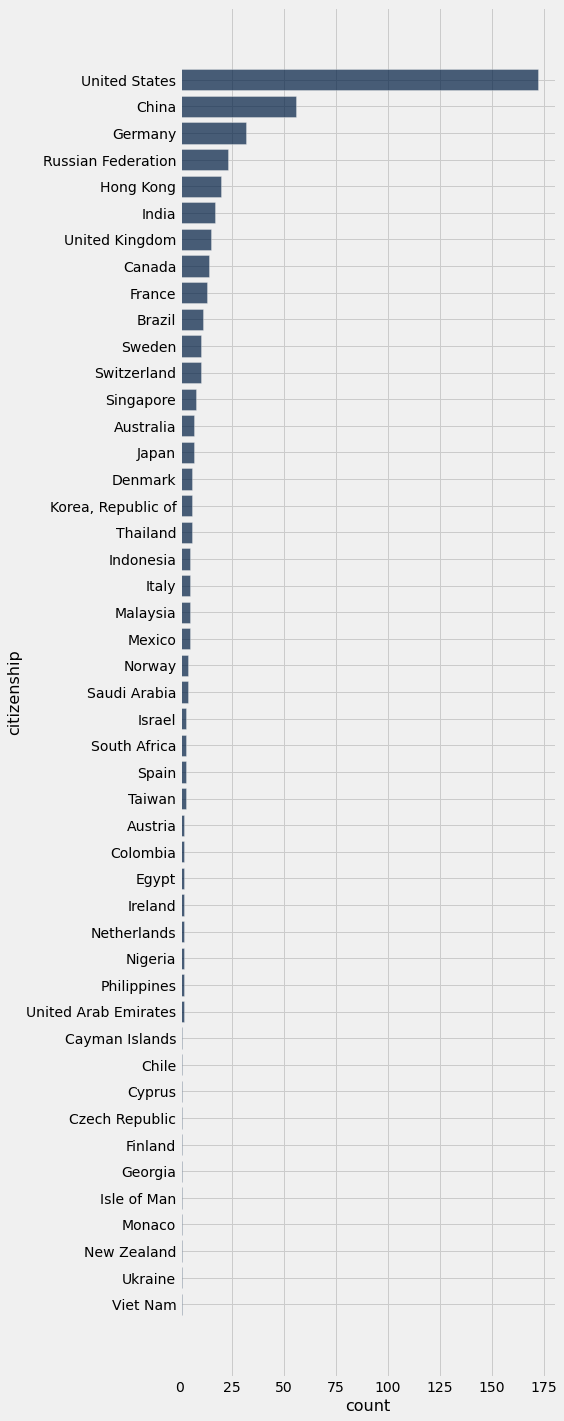

In [56]:
(billionaires.group('citizenship')
             .sort(1, descending=True)
             .barh('citizenship'))

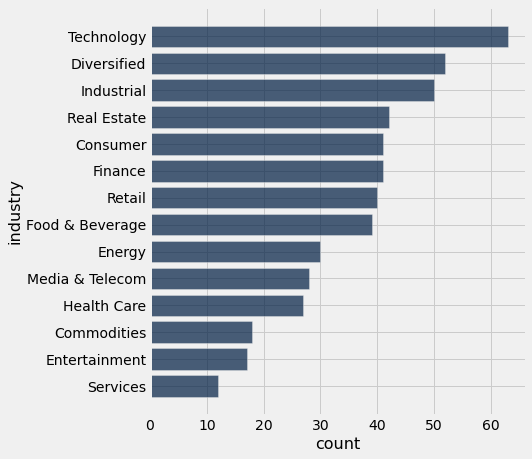

In [38]:
(billionaires.group('industry')
             .sort(1, descending=True)
             .barh('industry'))

In [100]:
billionaires.pivot('industry', 'citizenship').show(5)

citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [41]:
countries.where('Continent', 'North America')

Continent,Country
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Cayman Islands
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic


In [101]:
billionaires.pivot('industry', 'Continent')

Continent,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Africa,0,0,2,0,0,0,1,0,2,2,0,0,0,0
Asia,7,10,27,12,4,4,11,11,21,3,23,8,6,21
Europe,1,17,13,1,4,1,9,10,21,4,5,15,4,6
North America,6,14,10,17,9,29,14,6,4,19,12,17,2,33
Oceania,2,0,0,0,0,1,0,0,1,0,2,0,0,2
South America,2,0,0,0,0,6,4,0,1,0,0,0,0,1


In [70]:
b_donations = Table.read_table("billionaire donations.csv")
b_donations.show()

name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,6.20425e+06,0.000163232
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06,0.00013641
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000,0.000187014
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,529886,0.000115316
Jim Walton,United States,52493506006,Retail,North America,Wal-Mart Stores Inc,200,444700,8.47152e-06
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,442364,8.1599e-05
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,368000,4.38195e-05
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,280050,3.47056e-05
Eric Schmidt,United States,16579148665,Technology,North America,google,100,257300,1.55195e-05
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,241700,5.28927e-05


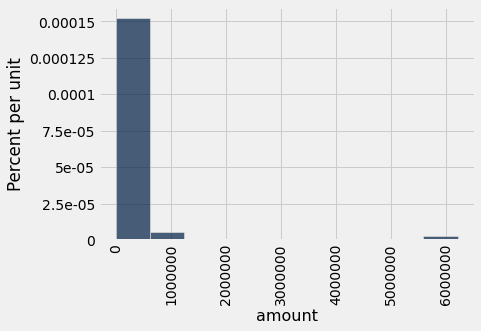

In [105]:
b_donations.hist('amount')

In [72]:
ceos = b_donations.select("company", "name", "party", "amount")

ceos.sort('amount', descending=True)

company,name,party,amount
Las Vegas Sands,Sheldon Adelson,200,6.20425e+06
Charles Schwab Corp,Charles Schwab,200,1.2364e+06
Franklin Resources,Charles Johnson,200,858000
Energy Transfer,Kelcy Warren,200,529886
Wal-Mart Stores Inc,Jim Walton,200,444700
PepsiCo Inc,Ray Hunt,200,442364
Kinder Morgan,Richard Kinder,200,368000
Liberty Global,John Malone,200,280050
google,Eric Schmidt,100,257300
Facebook,Reed Hastings,100,241700


In [73]:
ceos.sort('amount', descending=False)

company,name,party,amount
Goldman Sachs Group,Lakshmi Mittal,100,200
Kinder Morgan,Richard Kinder,100,1000
Assurant,Charles Koch,100,1500
Charles Schwab Corp,Charles Schwab,100,1800
Amazon.com Inc,Jeff Bezos,100,1800
HCA Holdings Inc,Thomas Frist,100,2400
News Corp,Rupert Murdoch,100,2500
Berkshire Hathaway Inc,Walter Scott,100,2500
Amazon.com Inc,John Brown,100,2812
CVR Energy,Carl Icahn,100,3000


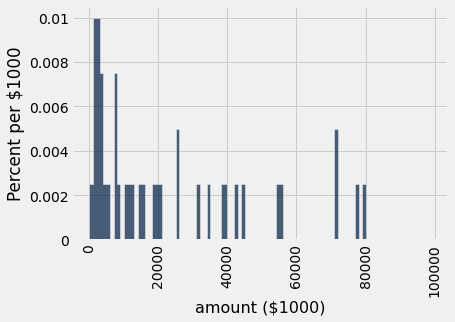

In [104]:
ceos.hist('amount', bins=np.arange(0, 1e5, 1e3), unit='$1000')

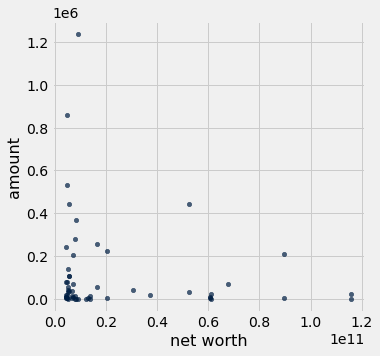

In [60]:
b_donations.where('amount', are.below(6e6)).scatter('net worth', 'amount')

In [61]:
donation_prop = b_donations.column('amount') / b_donations.column('net worth')
b_donations = b_donations.with_column('Contribution%', donation_prop)
b_donations = b_donations.sort('amount', descending=True)
b_donations.set_format('Contribution%', PercentFormatter)
b_donations.show(20)

name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,6.20425e+06,0.02%
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06,0.01%
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000,0.02%
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,529886,0.01%
Jim Walton,United States,52493506006,Retail,North America,Wal-Mart Stores Inc,200,444700,0.00%
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,442364,0.01%
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,368000,0.00%
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,280050,0.00%
Eric Schmidt,United States,16579148665,Technology,North America,google,100,257300,0.00%
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,241700,0.01%
